📜 Carregando o Grimório de Runas (MNIST)...

🔮 Treinando o Oráculo (Isso pode levar alguns segundos)...
Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9530 - loss: 0.1558 - val_accuracy: 0.9848 - val_loss: 0.0562
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9847 - loss: 0.0489 - val_accuracy: 0.9873 - val_loss: 0.0486
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9892 - val_loss: 0.0433


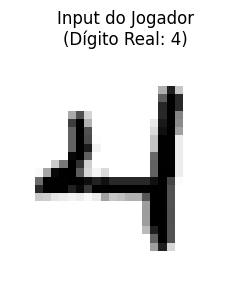


--- LOG DE BATALHA ---
🧙 Jogador desenhou um símbolo...
🤖 IA analisou com 100.00% de certeza.
✅ SUCESSO! Você conjurou: 🌪️ TORNADO (Wind)


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import random

# --- 1. PREPARAÇÃO DO "GRIMÓRIO" (DATASET) ---
print("📜 Carregando o Grimório de Runas (MNIST)...")
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalização (0-255 -> 0-1) e Reshape para o formato que a CNN aceita (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Dicionário de Tradução: Dígito -> Magia
spell_book = {
    0: "🔥 BOLA DE FOGO (Fireball)",
    1: "❄️ LANÇA DE GELO (Ice Shard)",
    2: "⚡ RELÂMPAGO (Thunder)",
    3: "🛡️ ESCUDO MÁGICO (Shield)",
    4: "🌪️ TORNADO (Wind)",
    5: "💚 CURA (Heal)",
    6: "💀 NECROMANCIA (Revive)",
    7: "⚔️ ESPADA ETÉREA (Slash)",
    8: "🌀 PORTAL DIMENSIONAL (Warp)",
    9: "☄️ METEORO (Ultimate)"
}

# --- 2. FORJANDO O CÉREBRO MÁGICO (CNN ARCHITECTURE) ---
model = Sequential([
    # O "Olho" da IA: Detecta bordas e curvas simples
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)), # Reduz a imagem, focando no importante
    
    # O "Córtex Visual": Detecta formas complexas (loops, cruzamentos)
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # O "Decisor": Transforma as formas em probabilidade de Magia
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # 10 Magias possíveis
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento Rápido (apenas 3 épocas para a aula)
print("\n🔮 Treinando o Oráculo (Isso pode levar alguns segundos)...")
model.fit(x_train, y_train, epochs=3, validation_split=0.1)

# --- 3. SIMULAÇÃO DO JOGO (GAME LOOP) ---
def cast_spell_simulation():
    # O jogo seleciona uma "entrada do jogador" aleatória do conjunto de teste
    random_idx = random.randint(0, len(x_test) - 1)
    player_drawing = x_test[random_idx]
    true_label = y_test[random_idx]
    
    # A IA "olha" para o desenho
    # Adicionamos uma dimensão extra pq o Keras espera um lote de imagens, não uma só
    input_tensor = np.expand_dims(player_drawing, axis=0) 
    
    # Predição
    prediction = model.predict(input_tensor, verbose=0)
    predicted_rune = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    
    # Visualização
    plt.figure(figsize=(3, 3))
    plt.imshow(player_drawing.reshape(28, 28), cmap='gray_r') # Invertido para parecer tinta no papel
    plt.title(f"Input do Jogador\n(Dígito Real: {true_label})")
    plt.axis('off')
    plt.show()
    
    print(f"\n--- LOG DE BATALHA ---")
    print(f"🧙 Jogador desenhou um símbolo...")
    print(f"🤖 IA analisou com {confidence:.2f}% de certeza.")
    
    if predicted_rune == true_label:
        print(f"✅ SUCESSO! Você conjurou: {spell_book[predicted_rune]}")
    else:
        print(f"❌ FALHA! O desenho estava confuso. A magia falhou.")
        print(f"(A IA achou que era {spell_book[predicted_rune]})")

# Executar a simulação
cast_spell_simulation()

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import numpy as np
import random
import cv2 # Importante para tratar a imagem do desenho
import gradio as gr # A biblioteca da interface visual
# ==============================================================================
# PARTE 2: A NOVA INTERFACE DE DESENHO (GRADIO CORRIGIDO)
# ==============================================================================

def reconhecer_desenho(imagem_desenhada):
    """
    Esta função pega o desenho feito no Gradio e prepara para a IA ler.
    """
    if imagem_desenhada is None:
        return None

    # O Sketchpad agora retorna um dicionário com 'composite', 'layers', etc.
    # Precisamos pegar apenas a imagem composta (o desenho final).
    if isinstance(imagem_desenhada, dict):
        imagem_desenhada = imagem_desenhada['composite']

    # 1. Converter para tons de cinza
    # Se a imagem tiver 3 canais (RGB) ou 4 (RGBA), converte para cinza
    if len(imagem_desenhada.shape) >= 3:
        imagem_desenhada = cv2.cvtColor(imagem_desenhada, cv2.COLOR_RGB2GRAY)

    # 2. Redimensionar para 28x28 pixels (Tamanho exato que a IA aprendeu)
    imagem_resized = cv2.resize(imagem_desenhada, (28, 28))

    # Gradio: Preto no Branco vs MNIST: Branco no Preto.
    # Invertemos para a IA entender.
    imagem_invertida = 255 - imagem_resized

    # 4. Normalizar (0 a 1) e ajustar dimensões para o Keras (1, 28, 28, 1)
    input_tensor = imagem_invertida.reshape(1, 28, 28, 1) / 255.0

    # 5. Predição usando O SEU MODELO
    predicao = model.predict(input_tensor, verbose=0).flatten()
    
    # Retornar dicionário com as probabilidades para a interface
    return {spell_book[i]: float(predicao[i]) for i in range(10)}

# Configuração da Interface Visual
interface = gr.Interface(
    fn=reconhecer_desenho, 
    inputs=gr.Sketchpad(label="Desenhe a Runa (0-9)", type="numpy"), 
    outputs=gr.Label(num_top_classes=3, label="Magia Identificada"),
    title="🧙‍♂️ Grimório Digital Interativo",
    description="Desenhe um número de 0 a 9 para lançar o feitiço correspondente!",
    live=True
)

print("--- Abrindo Portal Mágico... Clique no link abaixo (http://127.0.0.1:7860) ---")
interface.launch()

--- Abrindo Portal Mágico... Clique no link abaixo (http://127.0.0.1:7860) ---
* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/leonardoraiz/Library/Mobile Documents/com~apple~CloudDocs/Fatec/FATEC/Aulas/IA/Outros/.venv/lib/python3.13/site-packages/gradio/queueing.py", line 766, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
    )
    ^
  File "/Users/leonardoraiz/Library/Mobile Documents/com~apple~CloudDocs/Fatec/FATEC/Aulas/IA/Outros/.venv/lib/python3.13/site-packages/gradio/route_utils.py", line 355, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<11 lines>...
    )
    ^
  File "/Users/leonardoraiz/Library/Mobile Documents/com~apple~CloudDocs/Fatec/FATEC/Aulas/IA/Outros/.venv/lib/python3.13/site-packages/gradio/blocks.py", line 2152, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<8 lines>...
    )
    ^
  File "/Users/leonardoraiz/Librar